# Introducción
La enfermedad por el virus del Ébola es grave y a menudo mortal causada por un virus. Los síntomas incluyen fiebre, diarrea, vómitos, sangrado $\mathrm{y}$, con frecuencia, causa la muerte. Esta afección se descubrió en 1976 cerca del río Ébola en la República Democrática del Congo. Desde entonces, se han presentado varios brotes pequeños en África. El brote de la enfermedad del Ébola en África occidental, que inició en marzo de 2014, fue la epidemia viral hemorrágica más grande en la historia.

## Actividades
Importe el conjunto de datos de casos de una epidemia de ébola simulada utilizando el archivo `linelist_cleaned.csv`.


In [257]:
# Immportemmos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.get_configdir()

import seaborn as sns

sns.set()
# Los gráficos en formato retina son más nítidos y legibles
#%config InlineBackend.figure_format = 'retina'

In [258]:
ebola = pd.read_csv('linelist_cleaned.csv')
ebola.head(5)

,case_id,generation,date_infection,date_onset,date_hospitalisation,date_outcome,outcome,gender,age,age_unit,...,ct_blood,fever,chills,cough,aches,vomit,temp,time_admission,bmi,days_onset_hosp
0,5fe599,4,05/08/2014,05/13/2014,05/15/2014,NaN,NaN,m,2.0,years,...,22,no,no,yes,no,yes,36.8,NaN,117.187500,2.0
1,8689b7,4,NaN,05/13/2014,05/14/2014,05/18/2014,Recover,f,3.0,years,...,22,NaN,NaN,NaN,NaN,NaN,36.9,09:36,71.818443,1.0
2,11f8ea,2,NaN,05/16/2014,05/18/2014,05/30/2014,Recover,m,56.0,years,...,21,NaN,NaN,NaN,NaN,NaN,36.9,16:48,16.065250,2.0
3,b8812a,3,05/04/2014,05/18/2014,05/20/2014,NaN,NaN,f,18.0,years,...,23,no,no,no,no,no,36.8,11:22,22.496571,2.0
4,893f25,3,05/18/2014,05/21/2014,05/22/2014,05/29/2014,Recover,m,3.0,years,...,23,no,no,yes,no,yes,36.9,12:60,71.414402,1.0


De acuerdo con la información anterior y con los datos de la importación del archivo, realice las siguientes actividades:
- Elabore una gráfica (la que considere conveniente) que muestre una distribución sobre la cantidad de casos de Ébola en relación con la edad de los pacientes (age).

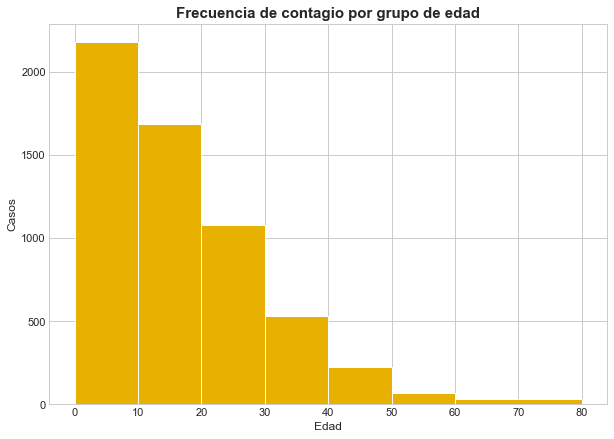

In [278]:
# Vamos a requerir la columna 'age', y vamos a considerar cada registro como un caso
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('seaborn-whitegrid')

bins_list = [0, 10, 20, 30, 40, 50, 60, 80]

ebola['age'].hist(bins = bins_list, color = '#E8B000')

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 81, 10)
minor_ticks = np.arange(0, 81, 5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.xlabel('Edad')
plt.ylabel('Casos')
  
plt.title('Frecuencia de contagio por grupo de edad',
          fontweight ="bold", size = 15)

plt.savefig('images/contagios.pdf')

- Elabore una grafica de dispersión que indique el peso de los pacientes (wt_kg) en relación con la edad de los pacientes (age) y el género (gender). Esto es, toda la información solicitada debe observarse en una sola gráfica.

In [260]:
ebola['gender'].unique()

array(['m', 'f', nan], dtype=object)

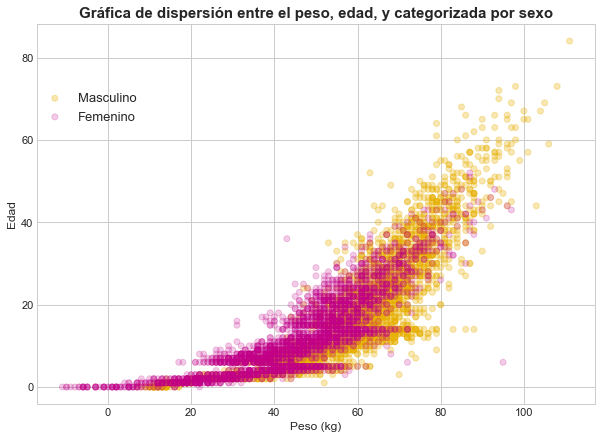

In [261]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('seaborn-whitegrid')

M = ebola[ebola['gender'] == 'm']
F = ebola[ebola['gender'] == 'f']
N = ebola[ebola['gender'] == np.NaN]

colors = {'m': '#E8B000', 'f': '#C2008A', np.NaN : '#3D3D3D'}

plt.scatter(M['wt_kg'], M['age'], c = M['gender'].map(colors), alpha=0.3, label = 'Masculino')
plt.scatter(F['wt_kg'], F['age'], c = F['gender'].map(colors), alpha=0.2, label = 'Femenino')
#plt.scatter(N['wt_kg'], N['age'], c = N['gender'].map(colors), alpha=0.5, label = 'No definido')

ax.legend(fontsize = 13, bbox_to_anchor=(0, 0, 0.2, 0.85))

plt.xlabel('Peso (kg)')
plt.ylabel('Edad')
  
plt.title('Gráfica de dispersión entre el peso, edad, y categorizada por sexo',
          fontweight ="bold", size = 15)

plt.savefig('images/dispersión.pdf')




Una curva epidémica (también conocida como "epicurva") es un gráfico epidemiológico central que se usa típicamente para visualizar el patrón temporal de aparición de la enfermedad entre un grupo o una epidemia de casos. El análisis de la epicurva puede revelar tendencias temporales, valores atípicos, la magnitud del brote, el período de tiempo más probable de exposición, intervalos de tiempo entre generaciones de casos e incluso puede ayudar a identificar el modo de transmisión de una enfermedad no identificada (por ejemplo, fuente puntual, transmisión continua, fuente común, propagación de persona a persona).
- Elabore una gráfica que indique el número de casos agregados semanales por hospital.

In [262]:
ebola['cont'] = 1
ebola['date_infection'] = pd.to_datetime(ebola['date_infection'])

ebola['week_id'] = ebola['date_infection'].dt.strftime('%Y-%U')


In [263]:
ebola['week_id']

0       2014-18
1           NaN
2           NaN
3       2014-18
4       2014-20
         ...   
5883    2015-15
5884        NaN
5885        NaN
5886        NaN
5887    2015-16
Name: week_id, Length: 5888, dtype: object

In [264]:
df = ebola.groupby(['hospital', pd.Grouper(key='date_infection', freq='W-MON')])['cont'].sum()

In [265]:
df = df.to_frame().reset_index()
df['date_infection'] = df['date_infection'].dt.strftime('%Y-%U')

In [266]:
def to_map(hospital):
    H = df[df['hospital'] == hospital][['date_infection', 'cont']]
    H = H.rename(columns={"cont": hospital})
    H = H.set_index('date_infection')
    return H


In [267]:
DF = pd.DataFrame()
for H in list(df['hospital'].unique()):
   hospital = to_map(H)
   DF = pd.concat([DF, hospital], axis=1, join="outer")

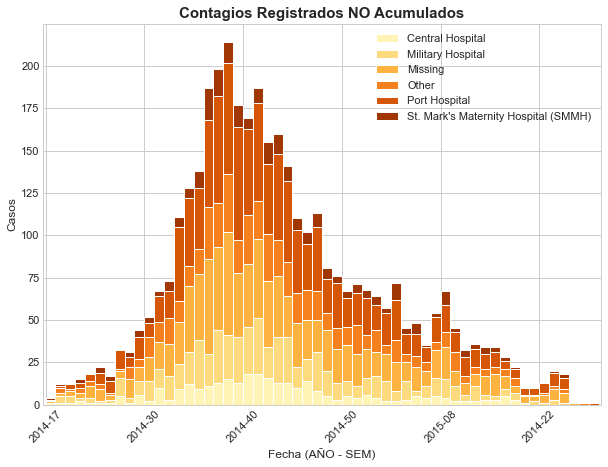

In [268]:

from matplotlib.colors import ListedColormap

DF[['Central Hospital', 'Military Hospital', 'Missing', 'Other',
       'Port Hospital', 'St. Mark\'s Maternity Hospital (SMMH)']].plot(kind='bar', figsize=(10, 7), stacked=True,
                                                                             align='edge', width=1, 
                                                                             colormap=ListedColormap(sns.color_palette("YlOrBr", 6)))

major_ticks = np.arange(0, 60, 10)

plt.xticks(major_ticks)
plt.xticks(rotation=45)

plt.xlabel('Fecha (AÑO - SEM)')
plt.ylabel('Casos')


plt.title('Contagios Registrados NO Acumulados',
          fontweight ="bold", size = 15)
plt.savefig('images/casoss.pdf')

ACUMULATIVO

In [269]:
DFA = DF.fillna(0).cumsum(axis = 0)

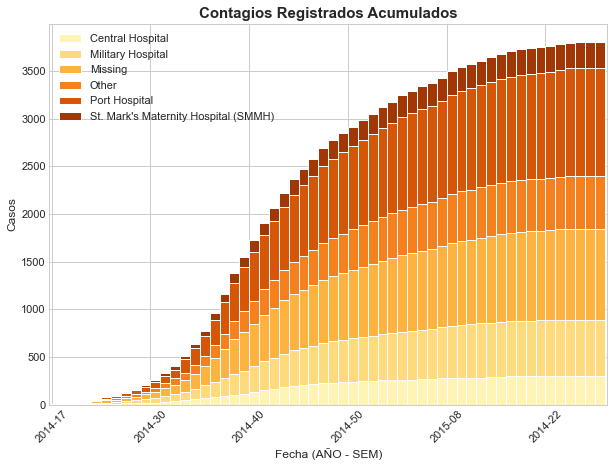

In [270]:
from matplotlib.colors import ListedColormap

DFA[['Central Hospital', 'Military Hospital', 'Missing', 'Other',
       'Port Hospital', 'St. Mark\'s Maternity Hospital (SMMH)']].plot(kind='bar', figsize=(10, 7), stacked=True,
                                                                             align='edge', width=1, 
                                                                             colormap=ListedColormap(sns.color_palette("YlOrBr", 6)))

major_ticks = np.arange(0, 60, 10)

plt.xticks(major_ticks)
plt.xticks(rotation=45)

plt.xlabel('Fecha (AÑO - SEM)')
plt.ylabel('Casos')


plt.title('Contagios Registrados Acumulados',
          fontweight ="bold", size = 15)
plt.savefig('images/casossA.pdf')

- Elabore una gráfica de barras donde se muestre el total de hospitalizaciones por grupo de edad (age_cat). Todos los grupos de edad deben observarse en una sola grafica.


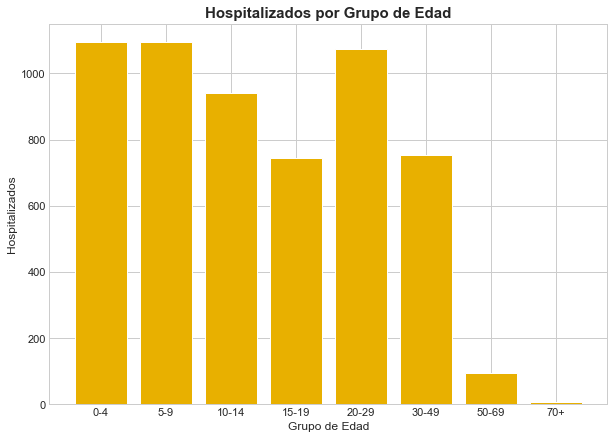

In [271]:
hosp = ebola[ebola['date_hospitalisation'] != np.NaN][['age_cat', 'cont']]

hosp_c = hosp.groupby(['age_cat']).count()
hosp_c = pd.DataFrame([1095, 1095, 941,  743, 1073,  754, 95, 6], 
                    index=['0-4', '5-9', '10-14', '15-19', '20-29', '30-49', '50-69', '70+'],
                    columns=['cont'])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)

plt.bar(hosp_c.index, hosp_c['cont'], color = '#E8B000')

plt.xlabel('Grupo de Edad')
plt.ylabel('Hospitalizados')
  
plt.title('Hospitalizados por Grupo de Edad',
          fontweight ="bold", size = 15)

plt.savefig('images/hosp.pdf')

- Elabore una gráfica de barras que indique el número de casos semanales por salida del paciente (outcome): recuperado, deceso, no se sabe. Toda la información se requiere en una sola grafica.

In [272]:
df_o = ebola.groupby(['outcome', pd.Grouper(key='date_infection', freq='W-MON')])['cont'].sum()
df_o = df_o.to_frame().reset_index()
df_o['date_infection'] = df_o['date_infection'].dt.strftime('%Y-%U')

In [273]:
def to_map_o(hospital):
    H = df_o[df_o['outcome'] == hospital][['date_infection', 'cont']]
    H = H.rename(columns={"cont": hospital})
    H = H.set_index('date_infection')
    return H

In [274]:
DFA = pd.DataFrame()
for H in list(df_o['outcome'].unique()):
   hospital = to_map_o(H)
   DFA = pd.concat([DFA, hospital], axis=1, join="outer")

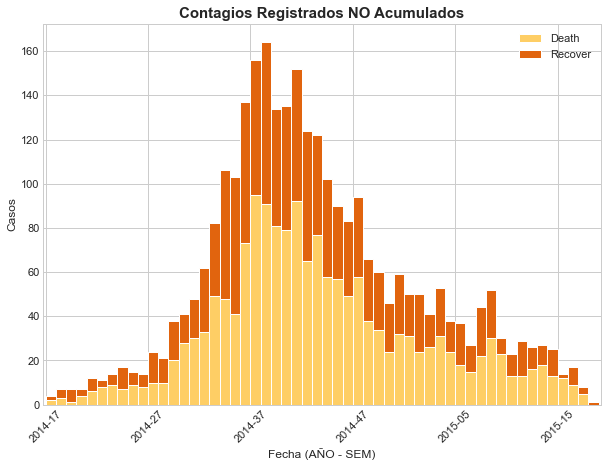

In [275]:
from matplotlib.colors import ListedColormap

DFA[['Death', 'Recover']].plot(kind='bar', figsize=(10, 7), stacked=True,
                              align='edge', width=1, 
                              colormap=ListedColormap(sns.color_palette("YlOrBr", 2)))

major_ticks = np.arange(0, 60, 10)

plt.xticks(major_ticks)
plt.xticks(rotation=45)

plt.xlabel('Fecha (AÑO - SEM)')
plt.ylabel('Casos')


plt.title('Contagios Registrados NO Acumulados',
          fontweight ="bold", size = 15)
plt.savefig('images/casossR.pdf')

In [276]:
DFA = DFA.fillna(0).cumsum(axis = 0)

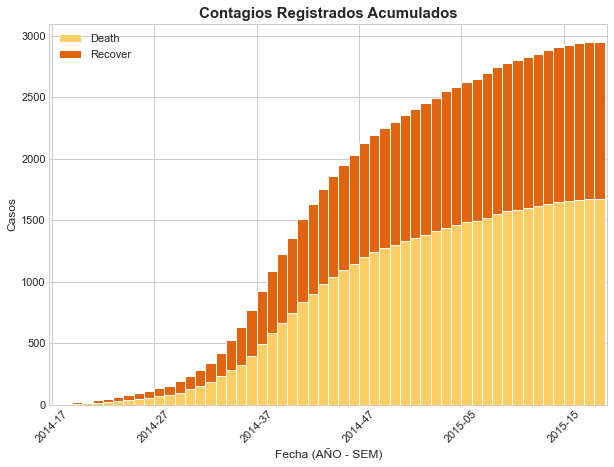

In [277]:
from matplotlib.colors import ListedColormap

DFA[['Death', 'Recover']].plot(kind='bar', figsize=(10, 7), stacked=True,
                              align='edge', width=1, 
                              colormap=ListedColormap(sns.color_palette("YlOrBr", 2)))

major_ticks = np.arange(0, 60, 10)

plt.xticks(major_ticks)
plt.xticks(rotation=45)

plt.xlabel('Fecha (AÑO - SEM)')
plt.ylabel('Casos')


plt.title('Contagios Registrados Acumulados',
          fontweight ="bold", size = 15)
plt.savefig('images/casossaR.pdf')

# Conclusiones

De acuerdo con todas sus gráficas anteriores y resultados obtenidos, describa las conclusiones que se pueden obtener a partir del conjunto de datos de casos de una epidemia de ébola simulada.